In [2]:
#importing libraries into python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
df = pd.read_csv('churn.csv')
senior = df[df.SeniorCitizen == 1]
non_senior = df[df.SeniorCitizen == 0]

# Customer Churn

## The Problem

In order to grow the telecommunication services as much as possible, it is not only important to reach out and acquire new customers but also to retain the customers that we already have. In a recent survey sent out to 7043 customers, 1869 of them said that they terminated their contract within the last month (25.6%). We will be looking into the data provided to see if there is anything we can do to lessen the number of customers who are terminating their contracts and maximize profits.

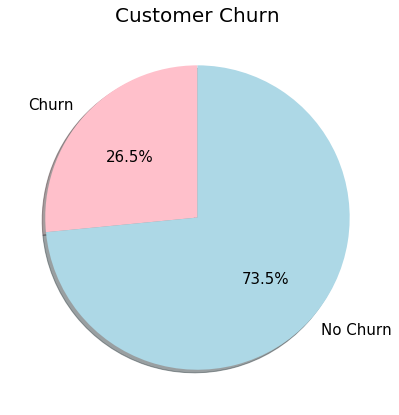

In [4]:
df_churn_ag = [len(df[df.Churn == 'Yes']), len(df[df.Churn == 'No'])]

fig, ax = plt.subplots(figsize=(12,7))
ax.pie(df_churn_ag, labels= ['Churn', 'No Churn'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['pink','lightblue'],textprops={'fontsize': 15})
plt.title('Customer Churn',size=20)
plt.show()

## Possible Solution

In order to see how we can lessen customer churn, we must first look at the data to see if there are any trends. In the survey, 1869 customers terminated their contracts within the last month. Of those 1869 customers, 1393 of them were non-seniors while 476 were seniors. We will be focusing our attention to non-seniors because they are the majority of the customers that churned. The bar graph below shows the customer churn in non-seniors by contract type. The contract breakdown for non-seniors that churned was: 1214 month-to-month contracts (39.57\% churn rate), 137 one-year contracts (10.68 \% churn rate), and 42 two-year contracts (2.71\% churn rate).

Text(0.5, 37.44000000000001, 'Churn')

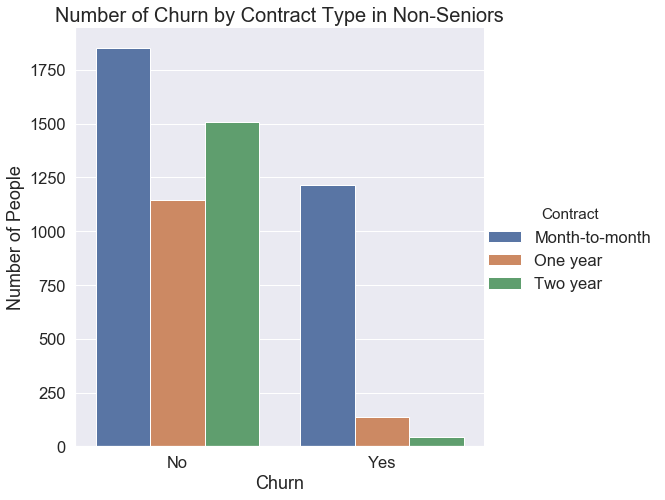

In [17]:
sns.catplot(x="Churn", hue = 'Contract', kind="count", data=non_senior, height=7)
sns.set(font_scale = 1.5)
plt.title('Number of Churn by Contract Type in Non-Seniors', size=20)
plt.ylabel('Number of People', size=18)
plt.xlabel('Churn', size=18)

Because the majority of non-seniors that churned were on month-to-month contracts (74.72\%), we will be focusing on that demographic and how to decrease it. The boxplot below shows the monthly charges by contract type in non-seniors. The first thing that jumps out is that the median monthly charges of month-to-month contracts that did not churn, 58.20, is considerably lower than than the median monthly charges of month-to-month contracts that churned, 75.73. This tells us that there are more lower-priced contracts among the non-seniors that did not churn. Not only is the median monthly charge considerably smaller among those that did not churn, but the mean monthly charge is also smaller. 58.2 dollars per month vs 70.62 dollars per month.

Text(64.85509126984128, 0.5, 'Monthly Charges ($)')

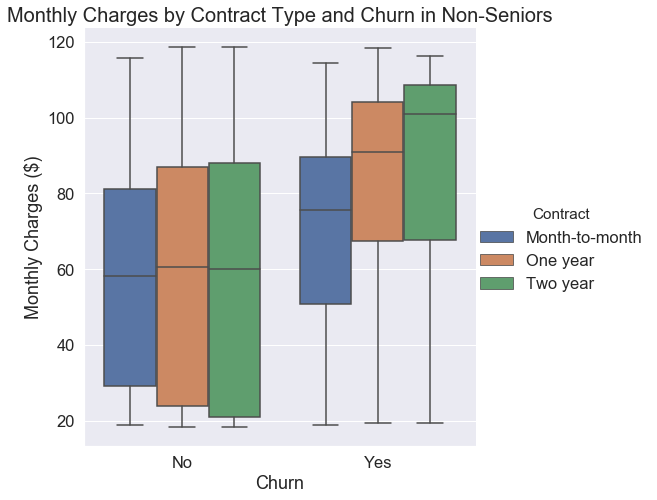

In [8]:
sns.catplot(x="Churn", y="MonthlyCharges", hue = 'Contract', kind="box", data=non_senior, height=7)
sns.set(font_scale = 1.3)
plt.title('Monthly Charges by Contract Type and Churn in Non-Seniors', size=20)
plt.xlabel('Churn', size=18)
plt.ylabel('Monthly Charges ($)', size=18)

In [24]:
print('These are the t-test results for comparing month-to-month contracts that churned to month-to-month contracts that did not churn: ', ttest_ind(non_senior[(non_senior.Churn == 'Yes') & (non_senior.Contract == 'Month-to-month')].MonthlyCharges, non_senior[(non_senior.Churn == 'No') & (non_senior.Contract == 'Month-to-month')].MonthlyCharges, equal_var=False ))
      

These are the t-test results for comparing month-to-month contracts that churned to month-to-month contracts that did not churn:  Ttest_indResult(statistic=12.945181240516268, pvalue=2.8762833439992997e-37)


The boxplot below shows some of the trends in contract length for non-seniors. We can see that the mean tenure of month-to-month contracts that churned was 12.47 months as opposed to 19.44 months that didnt churn. In order to help account for outliers, the median tenure length in month-to-month contracts that did not churn was 14 months as opposed to 6 months in contracts that did churn. With the monthly costs being 15 dollars higher between month-to-month contracts that churned than did not churn, one of the causes of the high churn rate could be the price point.

To first make sure that the demographic of non-seniors on month-to-month contracts that churned are statistically different from non-seniors on month-to-month contracts that did not churn, a t-test was run. The results of the t-test are above and show that there is a significant statistical difference between the two populations.

In an effort to reduce the month-to-month churn, we will run a promotion that will reduce the cost of month-to-month contracts to around 60 dollars per month. This will put month-to-month monthly charges at around the same price as the current median monthly charge of contracts that did not churn. By doing so, that should give us good insight into whether lowering the monthly charge will decrease the month-to-month churn rate. 

If we take the median monthly charge (75.73 dollars) and tenure length (6 months) in customers with month-to-month contracts that churned, the customer will have paid 454.38 dollars before they terminate their contract. In contrast, if we take the median monthly charge (58.15 dollars) and tenure length (14 months) in customers with month-to-month contracts that did not churn, the customer will have paid 814.10 dollars. This could allow us to retain our month-to-month customers for longer by decreasing churn rate, but also increase the amount that we receive per customer by 179\%.



Text(50.400755535714296, 0.5, 'Tenure Length (Months)')

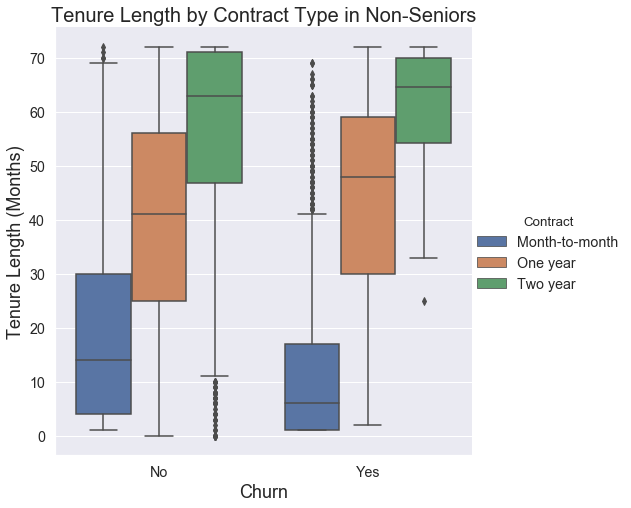

In [10]:
sns.catplot(x="Churn", y="tenure", hue = 'Contract', kind="box", data=non_senior, height=7)
sns.set(font_scale = 1.3)
plt.title('Tenure Length by Contract Type in Non-Seniors', size=20)
plt.xlabel('Churn', size=18)
plt.ylabel('Tenure Length (Months)', size=18)

## Rollout Plan


In order to test if reducing monthly payments on month-to-month contracts will reduce customer churn in non-seniors, we will be running a special promotion in the northwestern part of the USA starting in April that will be sent to non-seniors. These regions should be an accurate representation of our client population. There is no difference in our product regionally and thus by rolling out our promotion to these regions should give us an accurate polling of customer trends. People moving into new homes will be searching for a a new telecommunications service provider and running the promotion in April will coincide with the peak months that people in the US tend to move.

The special will run for 6 months and will aim to reduce monthly payments on month-to-month contracts to around 60 to 70 dollars depending on the add-ons that the customers opts in for. By keeping these payments in line with the median monthly charges of month-to-month charges that did not churn, we will be able to see if the higher monthly charges are a factor in the high month-to-month customer churn. 

In November another survey will be sent out to the the region with the promotion. By sending the survey out one month after the promotion ends, we will be able to see if the promotion decreased customer churn. The survey sent out will have the same questions as the previous survey but we will also ask what contract type they previously had or if they switched providers. This will give us additional information as to whether the decrease in month-to-month price caused customers to opt for a longer contract or not or if it brought in new customers as well.

If the results of the promotion show that there is a decrease in month-to-month churn, we will run the promotion again the following April nationally for another 6 months. Once the promotion ends, we will send out another survey to determine the results.

## Evaluation Plan

Our primary goal is to decrease customer churn in month-to-month contracts in non-seniors. Out of the 1869 contracts that churned in the survey, 1214 of those contracts were non-seniors with month-to-month contracts. In order to determine if the promotion is a success, we will be using whether or not they churned in the last month as the key statistic. The originally measured churn rate of non-seniors with month-to-month contracts was 39.57%. If the churn rate in that same group decreases by at least 10%, then we can call the promotion a success and consider rolling the promotion out nationally the following April. After 7 months, we will send out another survey and gather the data. If the customer churn comes back 10% lower than the 39.57% again, then we can say that the higher pricing of non-senior month-to-month contracts is causing an increase in customer churn and that it may be more profitable to permanently decrease the monthly charges.